In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.6
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.6 1
!sudo update-alternatives --config python3
!sudo apt-get install python3.6-distutils
!wget https://bootstrap.pypa.io/pip/3.6/get-pip.py
!python get-pip.py
!sudo apt install python3-pip
!python -m pip install --upgrade pip;

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Fetched 340 kB in 2s (179 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages 

In [ ]:
# Confirm that we are on Python version 3.6 and check our CPU/GPU configuration
!python --version
!lscpu |grep 'Model name'
!nvidia-smi -L

Python 3.6.15
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
GPU 0: Tesla T4 (UUID: GPU-fe1836a8-de29-451e-4fec-b8271f52d437)


In [ ]:
import time
import os
import random
import warnings
import numpy as np

# Import helper_functions.py script from our GitHub repository
!wget https://raw.githubusercontent.com/saniemeyer/dl4h-psychotic-disorders-replication/main/helper_functions.py -O helper_functions.py --backups=0 

# Import preprocessing.py script from our GitHub repository
!wget https://raw.githubusercontent.com/saniemeyer/dl4h-psychotic-disorders-replication/main/preprocessing.py -O preprocessing.py --backups=0

# Import keras_experiment.py script from our GitHub repository
!wget https://raw.githubusercontent.com/saniemeyer/dl4h-psychotic-disorders-replication/main/keras_experiment.py -O keras_experiment.py --backups=0

# Import classes and functions we're going to use
from helper_functions import hamming_score, plot_loss_curves, print_and_save_results
from preprocessing import Preprocessing
from keras_experiment import KerasExperiment

def warn(*args, **kwargs):
    pass

warnings.filterwarnings('ignore')
warnings.warn = warn

--2023-05-03 00:08:08--  https://raw.githubusercontent.com/saniemeyer/dl4h-psychotic-disorders-replication/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2327 (2.3K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   2.27K  --.-KB/s    in 0s      

2023-05-03 00:08:08 (46.2 MB/s) - ‘helper_functions.py’ saved [2327/2327]

--2023-05-03 00:08:08--  https://raw.githubusercontent.com/saniemeyer/dl4h-psychotic-disorders-replication/main/preprocessing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, 

In [ ]:
# Create our imbalanced and balanced datasets
Preprocessing.create_dataset()

In [ ]:
# Configure our number of splits and split ratio
n_splits = 100
test_size = 0.3 # a 70/30 train-test split was used for the Keras MLP models
dropout = 0 # We determined that no dropout resulted in optimal accuracy

# Set Seed
SEED = 100
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)

Experiment: Keras MLP Imbalanced Multi-Label
Execution Time (Mins): 6.5
            Model  Subset Accuracy  Hamming Score  Binary Accuracy
Keras Multi-Label         0.294041       0.661634         0.745014




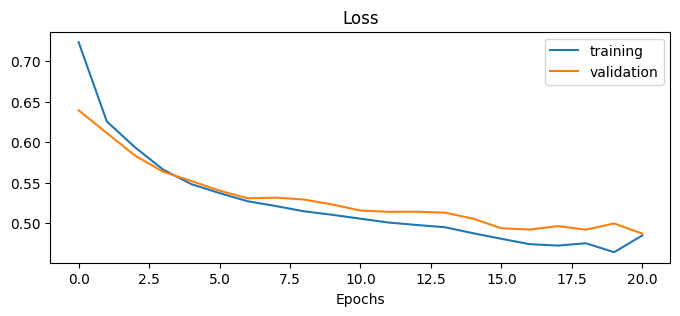

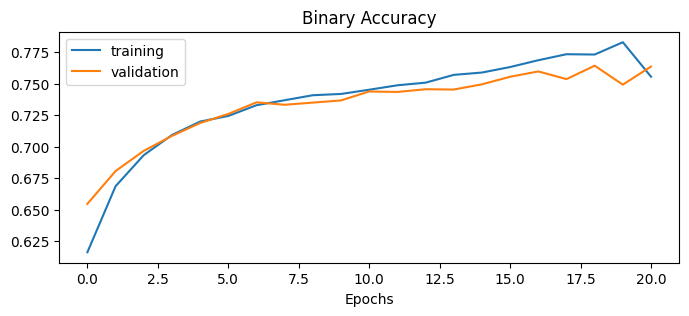

In [ ]:
# Run Imbalanced Multi-Label Experiment
start_time = time.time()
results, history = KerasExperiment.evaluate_multilabel_model(balanced=False, n_splits=n_splits, test_size=test_size, dropout=dropout)
print_and_save_results(experiment="Keras MLP Imbalanced Multi-Label", results=results, start_time=start_time, overwrite=True)
plot_loss_curves(history)


Experiment: Keras MLP Balanced Multi-Label
Execution Time (Mins): 8.8
            Model  Subset Accuracy  Balanced Accuracy  Hamming Score  Binary Accuracy
Keras Multi-Label          0.30772           0.310356       0.611074         0.736192




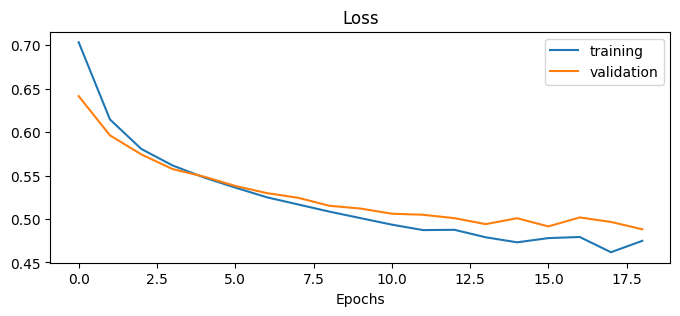

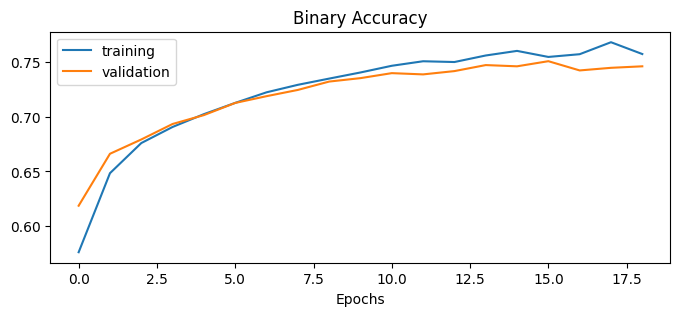

In [ ]:
# Run Balanced Multilabel-Label Experiment
start_time = time.time()
results, history = KerasExperiment.evaluate_multilabel_model(balanced=True, n_splits=n_splits, test_size=test_size, dropout=dropout)
print_and_save_results(experiment="Keras MLP Balanced Multi-Label", results=results, start_time=start_time)
plot_loss_curves(history)

In [ ]:
# Run Imbalanced Single-Label Experiment
start_time = time.time()
results = KerasExperiment.evaluate_singlelabel_model(balanced=False, n_splits=n_splits, test_size=test_size, dropout=dropout)
print_and_save_results(experiment="Keras MLP Imbalanced Single-Label", results=results, start_time=start_time)

Experiment: Keras MLP Imbalanced Single-Label
Execution Time (Mins): 23.3
           Target  Accuracy
             ADHD  0.560479
          Bipolar  0.567808
         Insomnia  0.569795
    Schizophrenia  0.867397
Vascular Dementia  0.672397




In [ ]:
# Run Balanced Single-Label Experiment
start_time = time.time()
results = KerasExperiment.evaluate_singlelabel_model(balanced=True, n_splits=n_splits, test_size=test_size, dropout=dropout)
print_and_save_results(experiment="Keras MLP Balanced Single-Label", results=results, start_time=start_time)

Experiment: Keras MLP Balanced Single-Label
Execution Time (Mins): 29.3
           Target  Accuracy
             ADHD  0.670879
          Bipolar  0.584505
         Insomnia  0.582060
    Schizophrenia  0.736456
Vascular Dementia  0.548874




In [ ]:
# Run Multi-Label Imbalanced Ablations
start_time = time.time()
KerasExperiment.run_ablations(experiment_name="Keras MLP Multi-label Imbalanced Ablations", balanced=False, n_splits=30)
print(f"Execution Time (Mins): {round(((time.time() - start_time) / 60.00), 1)}")

--------------------------------------------------------------------------------
Experiment: Keras MLP Multi-label Imbalanced Ablations
Best Model:
  Binary Accuracy: 0.7502740025520325
  Dropout: 0.1
  Exclude Layers: 1, 2, 3
--------------------------------------------------------------------------------
Grid-Search Run History:


,Binary Accuracy,Dropout,Exclude Layers
0,0.738219,0,1
1,0.747397,0,2
2,0.741918,0,3
3,0.742740,0,"1, 2"
4,0.743288,0,"1, 3"
5,0.749315,0,"2, 3"
6,0.744521,0,"1, 2, 3"
7,0.742740,0.1,1
8,0.746575,0.1,2
9,0.738973,0.1,3


Execution Time (Mins): 49.4


In [ ]:
# Run Multi-Label Balanced Ablations
start_time = time.time()
KerasExperiment.run_ablations(experiment_name="Keras MLP Balanced Multi-label DNN", balanced=True, n_splits=20)
print(f"Execution Time (Mins): {round(((time.time() - start_time) / 60.00), 1)}")


--------------------------------------------------------------------------------
Experiment: Keras MLP Balanced Multi-label DNN
Best Model:
  Balanced Accuracy: 0.3429315689026514
  Dropout: 0.15
  Exclude Layers: 1, 2
--------------------------------------------------------------------------------
Grid-Search Run History:


,Balanced Accuracy,Dropout,Exclude Layers
0,0.319074,0,1
1,0.339138,0,2
2,0.305602,0,3
3,0.324546,0,"1, 2"
4,0.325094,0,"1, 3"
5,0.304881,0,"2, 3"
6,0.306149,0,"1, 2, 3"
7,0.306182,0.1,1
8,0.287488,0.1,2
9,0.266971,0.1,3


Execution Time (Mins): 60.3
